# Creating a unified dataframe for later analysis (modified at TTK)

The dataframe should containd the ID, age, gender, number of years spent in music education, number of concerts, instrument (breath control required or not), session name (exam, rs, bl), group (experimental or not), bad signal ratio, minimum heart rate, maximum heart rate, average heart rate, various HRV metrics, various RVV metrics, RSA.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import signal
from scipy.io import wavfile
import warnings
import neurokit2 as nk
warnings.filterwarnings('ignore')

In [ ]:
# Version number of neurokit2 for publication
nk.__version__

'0.2.10'

In [2]:
# Create function for HRV data creation
def create_data(filepath, session, files, metrics):
    """
    Function to load, process, clean, and analyze ECG signal from CSV files.

    Args:
        filepath (str): The path to the folder of the ECG files.
        session (str): The type of session: "exam", "rs", or "bl".
        files (list): A list of filenames in the folder to load.
        metrics (list): List of HRV metrics to include in the final dataframe.
        method (str): Name of the cleaning method: 'neurokit', 'pantompkins1985', 'hamilton2002', 'elgendi2010', 'engzeemod2012'

    Returns:
        pd.DataFrame: A dataframe containing the HRV metrics for all participants.
    """
    
    # Create an empty list to store individual dataframes
    df_list = []
    
    # Load the data
    folder_path = Path(filepath) / session
    
    # Loop through ECG recordings
    for file in files:
        # Extract participant ID from filename
        participant_id = file[:6]
        session_name = session
        
        # Load ECG signal as csv
        # ecg_signal = pd.read_csv(os.path.join(folder_path, file))
        
        file_path = folder_path / file
        # Load wavfile
        sample_rate, ecg_signal = wavfile.read(os.path.join(folder_path, file))
        
        # Process the signal
        signals, rpeaks = nk.ecg_process(ecg_signal, sampling_rate=sample_rate)
        
        # Calculate HRV metrics
        hrv_data = nk.hrv(signals, sampling_rate=sample_rate, method="neurokit")
        
        # Subset for HRV metrics in focus
        hrv_data = hrv_data[metrics]

        # Add ecg quality assesment and heart rate
        hrv_data["session"] = session
        # hrv_data["quality"] = signals["ECG_Quality"]
        hrv_data["heart_rate"] = signals["ECG_Rate"][500:].mean()
        hrv_data["min_hr"] = signals["ECG_Rate"][500:].min()
        hrv_data["max_hr"] = signals["ECG_Rate"][500:].max()
        hrv_data["ID"] = participant_id
        
        # Add data to the list
        df_list.append(hrv_data)
        
    # Concatenate the dataframe
    hrv_combined = pd.concat(df_list, ignore_index=True)
        
    return hrv_combined

    

## Create exam data

#### Test data

In [ ]:
filepath = "/data/wav/"

session="exam"

files = ["vrt_05.wav"]
         
metrics = ["HRV_MeanNN", "HRV_SDNN", 'HRV_MinNN', 'HRV_MaxNN', "HRV_SDSD", 
            'HRV_RMSSD', "HRV_pNN20", "HRV_pNN50", "HRV_MadNN", "HRV_SD1",
            "HRV_SD2", "HRV_S", "HRV_SD1SD2", "HRV_VLF", "HRV_LF", "HRV_HF",
            "HRV_LFHF"]

In [ ]:
# Test function with example data
hrv_exam_test = create_data(filepath=filepath, session=session, files=files, metrics=metrics)
hrv_exam_test.columns

,HRV_MeanNN,HRV_SDNN,HRV_MinNN,HRV_MaxNN,HRV_SDSD,HRV_RMSSD,HRV_pNN20,HRV_pNN50,HRV_MadNN,HRV_SD1,...,HRV_SD1SD2,HRV_VLF,HRV_LF,HRV_HF,HRV_LFHF,session,heart_rate,min_hr,max_hr,ID
0,985.799036,599.767773,304.6875,7300.78125,780.955261,780.687447,94.092219,89.841499,422.772656,552.218761,...,0.888582,0.01202,0.030746,0.03895,0.789363,exam,64.436496,8.218299,196.923077,vrt_05


#### Real exam data

In [ ]:
# Set parameters
filepath = "data/wav/"

session="exam"

files = ["vrt_02.wav", "vrt_03.wav", "vrt_05.wav", "vrt_06.wav", "vrt_07.wav",
         "vrt_08.wav", "vrt_10.wav", "vrt_11.wav", "vrt_12.wav", "vrt_14.wav",
         "vrt_15.wav", "vrt_17.wav", "vrt_18.wav", "vrt_19.wav", "vrt_20.wav"]
         
metrics = ["HRV_MeanNN", "HRV_SDNN", 'HRV_MinNN', 'HRV_MaxNN', "HRV_SDSD", 
            'HRV_RMSSD', "HRV_pNN20", "HRV_pNN50", "HRV_MadNN", "HRV_SD1",
            "HRV_SD2", "HRV_S", "HRV_SD1SD2", "HRV_VLF", "HRV_LF", "HRV_HF",
            "HRV_LFHF"]

In [11]:
hrv_exam = create_data(filepath=filepath, session=session, files=files, metrics=metrics)
hrv_exam

,HRV_MeanNN,HRV_SDNN,HRV_MinNN,HRV_MaxNN,HRV_SDSD,HRV_RMSSD,HRV_pNN20,HRV_pNN50,HRV_MadNN,HRV_SD1,...,HRV_SD1SD2,HRV_VLF,HRV_LF,HRV_HF,HRV_LFHF,session,heart_rate,min_hr,max_hr,ID
0,430.919274,45.235213,347.65625,1535.15625,37.078145,37.072622,3.490453,2.237470,23.165625,26.218208,...,0.449310,0.002535,0.001749,0.001910,0.915997,exam,139.315715,39.083969,172.584270,vrt_02
1,366.206185,18.820149,335.93750,800.78125,13.972460,13.970843,0.950174,0.811124,11.582812,9.880021,...,0.399820,0.004181,0.004223,0.004948,0.853539,exam,163.872156,74.926829,178.604651,vrt_03
2,985.799036,599.767773,304.68750,7300.78125,780.955261,780.687447,94.092219,89.841499,422.772656,552.218761,...,0.888582,0.012020,0.030746,0.038950,0.789363,exam,64.436496,8.218299,196.923077,vrt_05
3,430.870912,50.404025,355.46875,792.96875,34.621108,34.606484,7.341772,5.063291,46.331250,24.480820,...,0.365871,0.002667,0.001788,0.000565,3.162385,exam,139.369954,75.665025,168.791209,vrt_06
4,1053.975592,556.814960,316.40625,3507.81250,702.861816,702.445307,93.964497,90.532544,480.686719,496.998356,...,0.813989,0.015679,0.039150,0.036763,1.064934,exam,59.882401,17.104677,189.629630,vrt_07
5,799.247644,462.474398,304.68750,3156.25000,521.544505,521.173579,77.524893,73.826458,416.981250,368.787656,...,0.682330,0.016253,0.031031,0.026872,1.154756,exam,78.196490,19.009901,196.923077,vrt_08
6,432.862756,103.151021,214.84375,1445.31250,92.795516,92.770835,30.728336,23.072834,52.122656,65.616339,...,0.503477,0.005907,0.008662,0.007611,1.138135,exam,139.114691,41.513514,279.272727,vrt_10
7,443.053817,22.034043,382.81250,601.56250,7.416604,7.415454,1.188986,0.250313,17.374219,5.244331,...,0.170733,0.011313,0.012242,0.002089,5.860434,exam,135.419894,99.740260,156.734694,vrt_11
8,479.552520,165.969486,304.68750,1757.81250,173.329931,173.284536,26.020942,24.136126,28.957031,122.562770,...,0.612191,0.016473,0.014268,0.015109,0.944301,exam,126.086591,34.133333,196.923077,vrt_12
9,391.141604,32.856412,339.84375,1074.21875,11.648258,11.649634,0.974478,0.232019,28.957031,8.236562,...,0.190202,0.004403,0.002159,0.000348,6.209110,exam,153.444485,55.854545,176.551724,vrt_14


## Create baseline data

In [ ]:
# Create baseline data
filepath = "data/wav/"

session="bl"

files = ["vrt_02.wav", "vrt_03.wav", "vrt_05.wav", "vrt_06.wav", "vrt_07.wav",
         "vrt_08.wav", "vrt_10.wav", "vrt_11.wav", "vrt_12.wav", "vrt_14.wav",
         "vrt_15.wav", "vrt_17.wav", "vrt_18.wav", "vrt_19.wav", "vrt_20.wav"]
         
metrics = ["HRV_MeanNN", "HRV_SDNN", 'HRV_MinNN', 'HRV_MaxNN', "HRV_SDSD", 
            'HRV_RMSSD', "HRV_pNN20", "HRV_pNN50", "HRV_MadNN", "HRV_SD1",
            "HRV_SD2", "HRV_S", "HRV_SD1SD2", "HRV_VLF", "HRV_LF", "HRV_HF",
            "HRV_LFHF"]

hrv_bl = create_data(filepath=filepath, session=session, files=files, metrics=metrics)
hrv_bl

,HRV_MeanNN,HRV_SDNN,HRV_MinNN,HRV_MaxNN,HRV_SDSD,HRV_RMSSD,HRV_pNN20,HRV_pNN50,HRV_MadNN,HRV_SD1,...,HRV_SD1SD2,HRV_VLF,HRV_LF,HRV_HF,HRV_LFHF,session,heart_rate,min_hr,max_hr,ID
0,575.198954,69.618051,398.43750,871.09375,24.929004,24.922454,13.319126,2.876931,69.496875,17.627468,...,0.181982,0.004735,0.002060,0.000675,3.050413,bl,104.338955,68.878924,150.588235,vrt_02
1,669.691367,40.658911,558.59375,824.21875,16.941504,16.936238,16.687817,1.586294,34.748438,11.979452,...,0.213095,0.012526,0.010572,0.001579,6.695842,bl,89.600158,72.796209,107.412587,vrt_03
2,765.145901,283.978598,332.03125,3355.46875,306.844713,306.719156,57.972200,35.895339,92.662500,216.971978,...,0.641731,0.000708,0.001898,0.002358,0.804707,bl,79.173517,17.881257,180.705882,vrt_05
3,627.463235,84.120984,410.15625,1101.56250,59.272840,59.238181,38.117647,18.117647,75.288281,41.912227,...,0.376686,0.017409,0.021385,0.017388,1.229869,bl,95.713607,54.468085,146.285714,vrt_06
4,1017.100505,511.394394,308.59375,2953.12500,664.778638,664.415463,92.576419,87.445415,480.686719,470.069483,...,0.854661,0.009869,0.027258,0.037845,0.720242,bl,61.912774,20.317460,194.430380,vrt_07
5,419.920136,62.125787,359.37500,777.34375,25.349768,25.339019,8.192342,3.739982,28.957031,17.924993,...,0.208578,0.012895,0.022725,0.003243,7.007215,bl,142.981714,77.185930,166.956522,vrt_08
6,614.874672,92.998116,472.65625,960.93750,38.925093,38.909360,39.660743,12.116317,81.079687,27.524197,...,0.214339,0.010017,0.020478,0.002207,9.278346,bl,97.658586,62.439024,126.942149,vrt_10
7,635.104073,43.991331,546.87500,851.56250,22.102378,22.097399,23.691336,4.106498,40.539844,15.628742,...,0.259658,0.006558,0.011694,0.003576,3.270198,bl,94.490968,70.458716,109.714286,vrt_11
8,793.885870,317.975927,304.68750,2847.65625,412.852762,412.653262,75.748792,62.415459,150.576562,291.930987,...,0.854276,0.006031,0.015776,0.015748,1.001765,bl,77.316927,21.069959,196.923077,vrt_12
9,574.647949,89.183599,433.59375,917.96875,30.184547,30.177699,21.233194,6.861382,75.288281,21.343698,...,0.171723,0.009119,0.009749,0.000986,9.891321,bl,104.446279,65.361702,138.378378,vrt_14


## Create resting state data

In [ ]:
# Create 5 min resting state data
filepath = "data/wav/"

session="rs"

files = ["vrt_02.wav", "vrt_03.wav", "vrt_05.wav", "vrt_06.wav", "vrt_07.wav",
         "vrt_08.wav", "vrt_10.wav", "vrt_11.wav", "vrt_12.wav", "vrt_14.wav",
         "vrt_15.wav", "vrt_17.wav", "vrt_18.wav", "vrt_19.wav", "vrt_20.wav"]
         
metrics = ["HRV_MeanNN", "HRV_SDNN", 'HRV_MinNN', 'HRV_MaxNN', "HRV_SDSD", 
            'HRV_RMSSD', "HRV_pNN20", "HRV_pNN50", "HRV_MadNN", "HRV_SD1",
            "HRV_SD2", "HRV_S", "HRV_SD1SD2", "HRV_VLF", "HRV_LF", "HRV_HF",
            "HRV_LFHF"]

hrv_rs = create_data(filepath=filepath, session=session, files=files, metrics=metrics)
hrv_rs

,HRV_MeanNN,HRV_SDNN,HRV_MinNN,HRV_MaxNN,HRV_SDSD,HRV_RMSSD,HRV_pNN20,HRV_pNN50,HRV_MadNN,HRV_SD1,...,HRV_SD1SD2,HRV_VLF,HRV_LF,HRV_HF,HRV_LFHF,session,heart_rate,min_hr,max_hr,ID
0,764.566017,105.962324,496.09375,941.40625,27.702806,27.667356,38.363171,7.672634,98.453906,19.588842,...,0.131698,0.006928,0.002557,0.000593,4.312462,rs,78.478625,63.734440,120.944882,vrt_02
1,812.627378,79.161636,566.40625,972.65625,37.068463,37.019214,55.706522,18.750000,63.705469,26.211362,...,0.242679,0.001974,0.015105,0.006366,2.372765,rs,73.736120,61.686747,105.205479,vrt_03
2,876.260081,99.576371,597.65625,1238.28125,81.428634,81.309191,73.020528,48.093842,92.662500,57.578739,...,0.447500,0.010321,0.046953,0.016435,2.856857,rs,68.523755,48.454259,100.392157,vrt_05
3,769.329897,42.342959,632.81250,914.06250,27.250803,27.216562,40.463918,6.701031,40.539844,19.269227,...,0.339935,0.013396,0.025166,0.007275,3.459347,rs,77.978189,65.641026,94.814815,vrt_06
4,1145.025144,703.490191,425.78125,4339.84375,920.404557,918.632892,85.823755,77.777778,335.901562,650.824304,...,0.862427,0.014517,0.033437,0.032255,1.036667,rs,55.237503,13.825383,140.917431,vrt_07
5,531.492840,105.681536,308.59375,1128.90625,76.134437,76.068704,30.728242,19.182948,46.331250,53.835177,...,0.386625,0.005535,0.013380,0.011668,1.146792,rs,113.033631,53.148789,194.430380,vrt_08
6,949.714782,79.390171,746.09375,1167.96875,66.312833,66.208007,79.047619,47.619048,81.079687,46.890254,...,0.460231,0.007982,0.012322,0.014849,0.829827,rs,63.226631,51.371237,80.418848,vrt_10
7,707.031250,45.551137,609.37500,843.75000,25.982935,25.952265,31.678487,7.801418,46.331250,18.372710,...,0.297273,0.002965,0.008547,0.003082,2.772793,rs,84.878298,71.111111,98.461538,vrt_11
8,839.130530,100.159409,375.00000,1089.84375,77.450936,77.343972,68.258427,36.516854,81.079687,54.766082,...,0.419303,0.010704,0.015363,0.018632,0.824531,rs,71.557773,55.053763,160.000000,vrt_12
9,894.624813,73.739590,667.96875,1050.78125,41.883571,41.822537,55.688623,23.053892,63.705469,29.616157,...,0.296239,0.012979,0.018289,0.006918,2.643546,rs,67.071761,57.100372,89.824561,vrt_14


## Concatenate exam, baseline and resting state dataframes

In [ ]:
# Concatenate all HRV dataframes
combined_hrv = pd.concat([hrv_exam, hrv_bl], ignore_index=True)
combined_hrv = pd.concat([combined_hrv, hrv_rs], ignore_index=True)
combined_hrv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HRV_MeanNN  45 non-null     float64
 1   HRV_SDNN    45 non-null     float64
 2   HRV_MinNN   45 non-null     float64
 3   HRV_MaxNN   45 non-null     float64
 4   HRV_SDSD    45 non-null     float64
 5   HRV_RMSSD   45 non-null     float64
 6   HRV_pNN20   45 non-null     float64
 7   HRV_pNN50   45 non-null     float64
 8   HRV_MadNN   45 non-null     float64
 9   HRV_SD1     45 non-null     float64
 10  HRV_SD2     45 non-null     float64
 11  HRV_S       45 non-null     float64
 12  HRV_SD1SD2  45 non-null     float64
 13  HRV_VLF     45 non-null     float64
 14  HRV_LF      45 non-null     float64
 15  HRV_HF      45 non-null     float64
 16  HRV_LFHF    45 non-null     float64
 17  session     45 non-null     object 
 18  heart_rate  45 non-null     float64
 19  min_hr      45 non-null     flo

In [ ]:
# Save dataframe
combined_hrv.to_csv("data/processed/combined_hrv_home.csv")

## Calculate bad signal ratio and add it to a dataframe

In [21]:
def calculate_bad_signal(filepath, files):
    """
    Function to load and calculate the ratio of bad signals in RR interval csv files.

    Args:
        filepath (str): The path to the folder containing the RR interval files.
        files (list): The list of files to process.

    Returns:
        pd.DataFrame: A dataframe containing the participant ID, session name, and the bad signal ratio percent.
    """
    # Create list of session names to loop through
    session_list = ["exam", "bl", "rs"]
    
    # Create empty list to add data dictionaries
    bad_signals_list = []
    
    # Loop through session categories
    for session in session_list:
        # Create filepath for each session
        folder_path = os.path.join(filepath, session)
        
        # Loop through files
        for file in files:
            # Extract participant ID from filename
            participant_id = file[:5]
            
            # Load RR interval file
            rr_intervals = pd.read_csv(os.path.join(folder_path, file))
            
            # Rename the column names (assuming the columns are in this order)
            rr_intervals.columns = ["time", "RRI", "quality"]
            
            # Calculate bad signal percentage
            bad_signal_count = (rr_intervals["quality"] == 129).sum()
            bad_signal_percentage = round((bad_signal_count / len(rr_intervals) * 100), 2)
            
            # Add data to the list as a dictionary
            bad_signals_list.append({
                "ID": participant_id,
                "session": session,
                "ecg_bad_signal_percentage": bad_signal_percentage
            })
    
    # Convert the list of dictionaries into a DataFrame
    bad_signals = pd.DataFrame(bad_signals_list)

    return bad_signals




In [22]:
rr_path = "C:/home/VRTraining_RR/"

files = ["vrt02.csv", "vrt03.csv", "vrt05.csv", "vrt06.csv", "vrt07.csv",
    "vrt08.csv", "vrt10.csv", "vrt11.csv", "vrt12.csv", "vrt14.csv",
    "vrt15.csv", "vrt17.csv", "vrt18.csv", "vrt19.csv", "vrt20.csv"]

signal_quality = calculate_bad_signal(filepath=rr_path, files=files)
signal_quality

,ID,session,ecg_bad_signal_percentage
0,vrt02,exam,0.15
1,vrt03,exam,0.00
2,vrt05,exam,24.59
3,vrt06,exam,0.25
4,vrt07,exam,47.22
5,vrt08,exam,14.07
6,vrt10,exam,3.31
7,vrt11,exam,0.00
8,vrt12,exam,13.56
9,vrt14,exam,0.00


In [ ]:
# Import hrv dataframe
combined_hrv = pd.read_csv("data/processed/combined_hrv_home.csv")
combined_hrv.drop(columns=["Unnamed: 0"], inplace=True)
combined_hrv.head()


,HRV_MeanNN,HRV_SDNN,HRV_MinNN,HRV_MaxNN,HRV_SDSD,HRV_RMSSD,HRV_pNN20,HRV_pNN50,HRV_MadNN,HRV_SD1,...,HRV_SD1SD2,HRV_VLF,HRV_LF,HRV_HF,HRV_LFHF,session,heart_rate,min_hr,max_hr,ID
0,430.919274,45.235213,347.65625,1535.15625,37.078145,37.072622,3.490453,2.237470,23.165625,26.218208,...,0.449310,0.002535,0.001749,0.001910,0.915997,exam,139.315715,39.083969,172.584270,vrt_02
1,366.206185,18.820149,335.93750,800.78125,13.972460,13.970843,0.950174,0.811124,11.582812,9.880021,...,0.399820,0.004181,0.004223,0.004948,0.853539,exam,163.872156,74.926829,178.604651,vrt_03
2,985.799036,599.767773,304.68750,7300.78125,780.955261,780.687447,94.092219,89.841499,422.772656,552.218761,...,0.888582,0.012020,0.030746,0.038950,0.789363,exam,64.436496,8.218299,196.923077,vrt_05
3,430.870912,50.404025,355.46875,792.96875,34.621108,34.606484,7.341772,5.063291,46.331250,24.480820,...,0.365871,0.002667,0.001788,0.000565,3.162385,exam,139.369954,75.665025,168.791209,vrt_06
4,1053.975592,556.814960,316.40625,3507.81250,702.861816,702.445307,93.964497,90.532544,480.686719,496.998356,...,0.813989,0.015679,0.039150,0.036763,1.064934,exam,59.882401,17.104677,189.629630,vrt_07


In [39]:
# Remove underscores from IDs
combined_hrv["ID"] = combined_hrv["ID"].str.replace("_", "")

## Add signal quality to HRV dataframe

In [34]:
# Add signal quality to HRV dataframe
combined_hrv = combined_hrv.merge(signal_quality, on=["session", "ID"], how="outer")
combined_hrv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HRV_MeanNN                 45 non-null     float64
 1   HRV_SDNN                   45 non-null     float64
 2   HRV_MinNN                  45 non-null     float64
 3   HRV_MaxNN                  45 non-null     float64
 4   HRV_SDSD                   45 non-null     float64
 5   HRV_RMSSD                  45 non-null     float64
 6   HRV_pNN20                  45 non-null     float64
 7   HRV_pNN50                  45 non-null     float64
 8   HRV_MadNN                  45 non-null     float64
 9   HRV_SD1                    45 non-null     float64
 10  HRV_SD2                    45 non-null     float64
 11  HRV_S                      45 non-null     float64
 12  HRV_SD1SD2                 45 non-null     float64
 13  HRV_VLF                    45 non-null     float64
 

## Combine HRV and RRV dataframes

In [ ]:
# Import RRV dataframe
combined_rrv = pd.read_csv("data/processed/combined_rrv.csv", index_col=["Unnamed: 0"])
print(combined_rrv.head())

print("HRV column names: ", combined_hrv.columns)
print("RRV column names: ", combined_rrv.columns)

   RSP_Rate_Mean    RRV_RMSSD     RRV_SDBB     RRV_SDSD   RRV_VLF    RRV_LF  \
0      27.080660   943.003388   856.169818   943.751380  0.006049  0.003118   
1      25.308138   961.082442   861.894585   961.836415  0.007696  0.004401   
2      13.151735  2410.220012  2321.070359  2426.545654  0.007616  0.003934   
3      16.346107  2971.049290  2801.719606  2982.540015  0.003414  0.002308   
4      14.650829  2349.496835  2263.318792  2355.220049  0.008665  0.003844   

     RRV_HF   RRV_LFHF  RRV_SD2SD1 session     ID  
0  0.000449   6.941327    1.513947    exam  vrt02  
1  0.000684   6.430302    1.487255    exam  vrt03  
2  0.000162  24.272157    1.630895    exam  vrt05  
3  0.000096  24.108758    1.590500    exam  vrt06  
4  0.000227  16.959128    1.641319    exam  vrt07  
HRV column names:  Index(['HRV_MeanNN', 'HRV_SDNN', 'HRV_MinNN', 'HRV_MaxNN', 'HRV_SDSD',
       'HRV_RMSSD', 'HRV_pNN20', 'HRV_pNN50', 'HRV_MadNN', 'HRV_SD1',
       'HRV_SD2', 'HRV_S', 'HRV_SD1SD2', 'HRV_VLF', '

In [42]:
# Merge dataframes
combined_df = combined_hrv.merge(combined_rrv, on=["session", "ID"], how="left")
print("DF lenght: ", len(combined_df))
combined_df.head()

DF lenght:  45


,HRV_MeanNN,HRV_SDNN,HRV_MinNN,HRV_MaxNN,HRV_SDSD,HRV_RMSSD,HRV_pNN20,HRV_pNN50,HRV_MadNN,HRV_SD1,...,ID,RSP_Rate_Mean,RRV_RMSSD,RRV_SDBB,RRV_SDSD,RRV_VLF,RRV_LF,RRV_HF,RRV_LFHF,RRV_SD2SD1
0,430.919274,45.235213,347.65625,1535.15625,37.078145,37.072622,3.490453,2.237470,23.165625,26.218208,...,vrt02,27.080660,943.003388,856.169818,943.751380,0.006049,0.003118,0.000449,6.941327,1.513947
1,366.206185,18.820149,335.93750,800.78125,13.972460,13.970843,0.950174,0.811124,11.582812,9.880021,...,vrt03,25.308138,961.082442,861.894585,961.836415,0.007696,0.004401,0.000684,6.430302,1.487255
2,985.799036,599.767773,304.68750,7300.78125,780.955261,780.687447,94.092219,89.841499,422.772656,552.218761,...,vrt05,13.151735,2410.220012,2321.070359,2426.545654,0.007616,0.003934,0.000162,24.272157,1.630895
3,430.870912,50.404025,355.46875,792.96875,34.621108,34.606484,7.341772,5.063291,46.331250,24.480820,...,vrt06,16.346107,2971.049290,2801.719606,2982.540015,0.003414,0.002308,0.000096,24.108758,1.590500
4,1053.975592,556.814960,316.40625,3507.81250,702.861816,702.445307,93.964497,90.532544,480.686719,496.998356,...,vrt07,14.650829,2349.496835,2263.318792,2355.220049,0.008665,0.003844,0.000227,16.959128,1.641319


## Add grouping variables

In [44]:
# Add gender: male = 1, female = 2, males in the list
gender = [
    "vrt02", "vrt03", "vrt10", "vrt11", "vrt14"
]

# Add group: exp = 1, ctr = 2, exp in the list
group = [
    "vrt02", "vrt03", "vrt06", "vrt07", "vrt12", "vrt14", "vrt15", "vrt19", "vrt20"
    ] 
# Add instrument type: breath control (incl. singing) = 1, non-breath control = 2, breath control intruments in the list
instrument = ["vrt06", "vrt07", "vrt08", "vrt10", "vrt14", "vrt15"]


# Add gender column and variables to the df
combined_df["gender"] = combined_df["ID"].apply(lambda x: 1 if x in gender else 2)
# Add group column and variables to the df
combined_df["group"] = combined_df["ID"].apply(lambda x: 1 if x in group else 2)
# Add intrument type and variables to the df
combined_df["instrument_type"] = combined_df["ID"].apply(lambda x: 1 if x in instrument else 2)

combined_df.info()

print(combined_df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HRV_MeanNN       45 non-null     float64
 1   HRV_SDNN         45 non-null     float64
 2   HRV_MinNN        45 non-null     float64
 3   HRV_MaxNN        45 non-null     float64
 4   HRV_SDSD         45 non-null     float64
 5   HRV_RMSSD        45 non-null     float64
 6   HRV_pNN20        45 non-null     float64
 7   HRV_pNN50        45 non-null     float64
 8   HRV_MadNN        45 non-null     float64
 9   HRV_SD1          45 non-null     float64
 10  HRV_SD2          45 non-null     float64
 11  HRV_S            45 non-null     float64
 12  HRV_SD1SD2       45 non-null     float64
 13  HRV_VLF          45 non-null     float64
 14  HRV_LF           45 non-null     float64
 15  HRV_HF           45 non-null     float64
 16  HRV_LFHF         45 non-null     float64
 17  session          4

In [ ]:
# Inspect the last five rows of the dataframe
combined_df.tail()

,HRV_MeanNN,HRV_SDNN,HRV_MinNN,HRV_MaxNN,HRV_SDSD,HRV_RMSSD,HRV_pNN20,HRV_pNN50,HRV_MadNN,HRV_SD1,...,RRV_SDBB,RRV_SDSD,RRV_VLF,RRV_LF,RRV_HF,RRV_LFHF,RRV_SD2SD1,gender,group,instrument_type
40,573.281550,26.958464,507.81250,667.96875,16.077546,16.063009,16.506718,0.767754,23.165625,11.368542,...,1247.481247,1270.613919,0.006388,0.002985,0.000118,25.244660,NaN,2,1,1
41,593.397733,115.810515,355.46875,2402.34375,132.055582,131.931525,26.853707,10.821643,46.331250,93.377398,...,1370.638498,1442.173500,0.019987,0.010809,0.000401,26.966921,NaN,2,2,2
42,799.510669,294.229839,324.21875,1984.37500,332.484694,332.036700,90.053763,85.483871,280.883203,235.102182,...,484.496324,522.528213,0.006110,0.031864,0.002802,11.373257,NaN,2,2,2
43,1087.439904,532.705280,304.68750,3050.78125,689.371313,688.103029,90.842491,85.714286,434.355469,487.459130,...,2052.787546,1551.519581,0.010199,0.002431,0.000095,25.626963,NaN,2,1,2
44,621.662227,48.389900,464.84375,792.96875,28.051640,28.022409,27.650728,6.652807,46.331250,19.835505,...,1410.264737,1109.089466,0.007603,0.001500,0.000040,37.423073,NaN,2,1,2


In [46]:
combined_df[["ID", "heart_rate", "session", "gender", "group"]].head(5)

,ID,heart_rate,session,gender,group
0,vrt02,139.315715,exam,1,1
1,vrt03,163.872156,exam,1,1
2,vrt05,64.436496,exam,2,2
3,vrt06,139.369954,exam,2,1
4,vrt07,59.882401,exam,2,1


## Save dataframe for analysis

In [ ]:
combined_df.to_csv("data/processed/combined_df.csv")

## Signals quality check

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

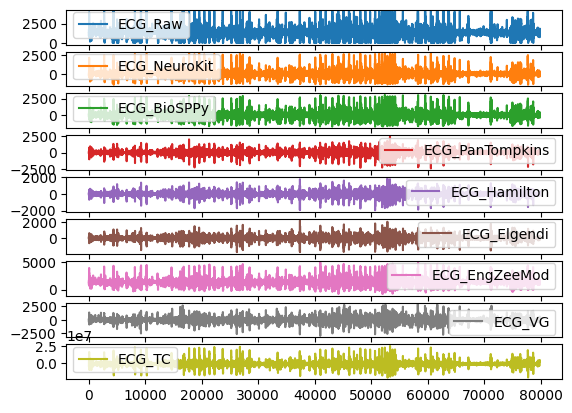

In [ ]:
# Signal quality test
ecg05_test = pd.read_csv("data/raw/vrt_05.csv")
ecg = ecg05_test["ECG_Signal"]

signals = pd.DataFrame({
    "ECG_Raw" : ecg,
    "ECG_NeuroKit" : nk.ecg_clean(ecg, sampling_rate=256, method="neurokit"),
    "ECG_BioSPPy" : nk.ecg_clean(ecg, sampling_rate=256, method="biosppy"),
    "ECG_PanTompkins" : nk.ecg_clean(ecg, sampling_rate=256, method="pantompkins1985"),
    "ECG_Hamilton" : nk.ecg_clean(ecg, sampling_rate=256, method="hamilton2002"),
    "ECG_Elgendi" : nk.ecg_clean(ecg, sampling_rate=256, method="elgendi2010"),
    "ECG_EngZeeMod" : nk.ecg_clean(ecg, sampling_rate=256, method="engzeemod2012"),
    "ECG_VG" : nk.ecg_clean(ecg, sampling_rate=256, method="vg"),
    "ECG_TC" : nk.ecg_clean(ecg, sampling_rate=256, method="templateconvolution")
})

signals.plot(subplots=True)


In [39]:
# signals quality check --- it only became acceptable (excellent?) with Zhaoe et al (2018) method and the "fuzzy" approach, all other options were unacceptable
signals_quality = pd.Series({
    "ECG_Raw" : nk.ecg_quality(signals["ECG_Raw"], sampling_rate=256, method="zhao2018", approach="fuzzy"),
    "ECG_NeuroKit" : nk.ecg_quality(signals["ECG_Raw"], sampling_rate=256, method="zhao2018", approach="fuzzy"),
    "ECG_BioSPPy" : nk.ecg_quality(signals["ECG_Raw"], sampling_rate=256, method="zhao2018", approach="fuzzy"),
    "ECG_PanTompkins" : nk.ecg_quality(signals["ECG_Raw"], sampling_rate=256, method="zhao2018", approach="fuzzy"),
    "ECG_Hamilton" : nk.ecg_quality(signals["ECG_Raw"], sampling_rate=256, method="zhao2018", approach="fuzzy"),
    "ECG_Elgendi" : nk.ecg_quality(signals["ECG_Raw"], sampling_rate=256, method="zhao2018", approach="fuzzy"),
    "ECG_EngZeeMod" : nk.ecg_quality(signals["ECG_Raw"], sampling_rate=256, method="zhao2018", approach="fuzzy"),
    "ECG_VG" : nk.ecg_quality(signals["ECG_Raw"], sampling_rate=256, method="zhao2018", approach="fuzzy"),
    "ECG_TC" : nk.ecg_quality(signals["ECG_Raw"], sampling_rate=256, method="zhao2018", approach="fuzzy") 
})

signals_quality

ECG_Raw            Excellent
ECG_NeuroKit       Excellent
ECG_BioSPPy        Excellent
ECG_PanTompkins    Excellent
ECG_Hamilton       Excellent
ECG_Elgendi        Excellent
ECG_EngZeeMod      Excellent
ECG_VG             Excellent
ECG_TC             Excellent
dtype: object